# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [11]:
df.shape

(50000, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

### finding unique values of `flight_day`

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [15]:
df["flight_day"].value_counts()

flight_day
1    8102
3    7674
2    7673
4    7424
5    6761
7    6554
6    5812
Name: count, dtype: int64

### Mapping the values of flight_day

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

### Checking for null values

In [9]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

## Analysing `Sales_channel`

In [10]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

### Sales_channel column is having imbalance values

In [12]:
df["sales_channel"].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

## Analysing `trip_type`

In [13]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [14]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [17]:
len(df['route'].unique())

799

In [19]:
len(df['booking_origin'].unique())

104

### `TargetEncoding` on large categorical values of `booking_origin`

In [24]:
import pandas as pd
import category_encoders as ce

# Initialize the TargetEncoder
encoder = ce.TargetEncoder(cols=['booking_origin'])

# Fit the encoder on the data
encoder.fit(df['booking_origin'], df['booking_complete'])

# Transform the data
data_encoded = encoder.transform(df['booking_origin'])

# Now 'booking_origin' has been replaced with the target encoded values
df['booking_origin']=data_encoded

In [25]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,0.050279,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,0.050279,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,0.103150,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,0.050279,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,0.103150,1,0,1,5.52,0


In [26]:
len(df['booking_origin'].unique())

62

### `TargetEncoding` on large categorical values of `route`

In [65]:
encoder = ce.TargetEncoder(cols=['route'])

# Fit the encoder on the data
encoder.fit(df['route'], df['booking_complete'])

# Transform the data
data_encoded = encoder.transform(df['route'])

# Now 'route' has been replaced with the target encoded values
df['route']=data_encoded

C:\Users\ARWINDD\AppData\Roaming\Python\Python312\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\ARWINDD\AppData\Roaming\Python\Python312\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
C:\Users\ARWINDD\AppData\Roaming\Python\Python312\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting objec

In [28]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,0.07478,0.050279,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,0.07478,0.050279,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,0.07478,0.103150,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,0.07478,0.050279,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,0.07478,0.103150,1,0,1,5.52,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  float64
 8   booking_origin         50000 non-null  float64
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 5.3+ 

### Mapping sales_Channel with `internet:1` and `Mobile:0`

In [31]:
df['sales_channel']=df['sales_channel'].map({'Internet':1,'Mobile':0})

In [32]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,RoundTrip,262,19,7,6,0.07478,0.050279,1,0,0,5.52,0
1,1,1,RoundTrip,112,20,3,6,0.07478,0.050279,0,0,0,5.52,0
2,2,1,RoundTrip,243,22,17,3,0.07478,0.103150,1,1,0,5.52,0
3,1,1,RoundTrip,96,31,4,6,0.07478,0.050279,0,0,1,5.52,0
4,2,1,RoundTrip,68,22,15,3,0.07478,0.103150,1,0,1,5.52,0


### Mapping `Trip_Type` with `'RoundTrip'`:0,`'OneWay'`:1, `'CircleTrip'`:2

In [33]:
df['trip_type']=df['trip_type'].map({'RoundTrip':0,'OneWay':1, 'CircleTrip':2})
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,0,262,19,7,6,0.07478,0.050279,1,0,0,5.52,0
1,1,1,0,112,20,3,6,0.07478,0.050279,0,0,0,5.52,0
2,2,1,0,243,22,17,3,0.07478,0.103150,1,1,0,5.52,0
3,1,1,0,96,31,4,6,0.07478,0.050279,0,0,1,5.52,0
4,2,1,0,68,22,15,3,0.07478,0.103150,1,0,1,5.52,0


### Finding `Correlation` 

In [34]:
df.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.002457,-0.002261,0.212606,-0.115850,0.015607,0.015407,0.062272,0.084325,0.120404,0.028544,0.022943,-0.063169,0.024116
sales_channel,0.002457,1.000000,0.021237,0.013399,0.060352,-0.022375,-0.042095,-0.028413,-0.052321,0.054254,-0.032943,0.022235,0.038629,0.041060
trip_type,-0.002261,0.021237,1.000000,0.008443,-0.006510,0.002758,0.001381,-0.054887,-0.035066,0.014078,-0.005668,-0.011955,0.039071,-0.027021
purchase_lead,0.212606,0.013399,0.008443,1.000000,-0.076560,0.035973,0.036531,0.009708,0.036511,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,0.060352,-0.006510,-0.076560,1.000000,-0.024872,-0.000310,-0.085350,-0.066688,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,-0.022375,0.002758,0.035973,-0.024872,1.000000,0.024086,-0.006160,-0.006118,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,-0.042095,0.001381,0.036531,-0.000310,0.024086,1.000000,-0.003087,-0.001961,-0.002503,0.005392,0.009281,0.018434,-0.006986
route,0.062272,-0.028413,-0.054887,0.009708,-0.085350,-0.006160,-0.003087,1.000000,0.552464,-0.005608,-0.036170,-0.079377,-0.319430,0.330181
booking_origin,0.084325,-0.052321,-0.035066,0.036511,-0.066688,-0.006118,-0.001961,0.552464,1.000000,0.023051,-0.037510,-0.087042,-0.273917,0.304005
wants_extra_baggage,0.120404,0.054254,0.014078,-0.022207,0.176757,-0.011434,-0.002503,-0.005608,0.023051,1.000000,0.207669,0.216470,0.057054,0.068139


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


### Visualising `Correlation` unsing `heatmap`

<Axes: >

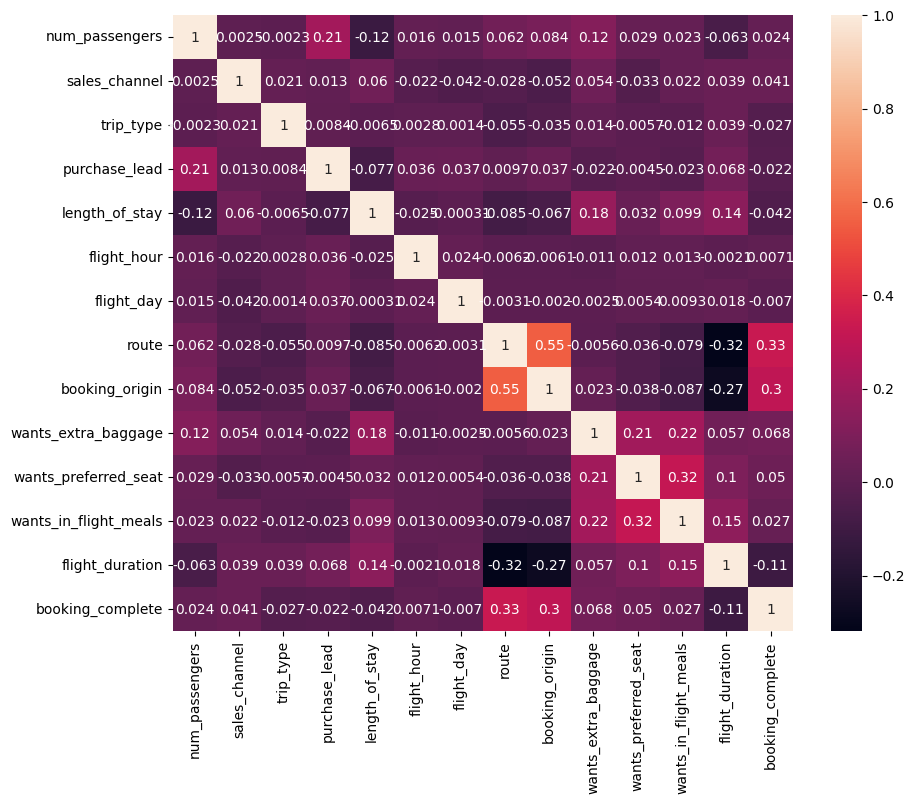

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [40]:
from sklearn.model_selection import train_test_split

### Splitting the data into `independent` and `dependent`

In [41]:
X=df.drop('booking_complete',axis=1)
y=df['booking_complete']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=df[['sales_channel', 'trip_type']])

### `RandomForestClassifier` model building

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [51]:
model=RandomForestClassifier()

### Fiiting the model

In [52]:
model.fit(X_train,y_train)

RandomForestClassifier()

### testing the model using x_test

In [53]:
y_pred=model.predict(X_test)

### Printing `Accuracy` and `classification_report`

In [54]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8479
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8465
           1       0.52      0.14      0.23      1535

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.81      0.85      0.81     10000



### `LogisticRegression` model building

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr=lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Accuracy: 0.8426
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      8465
           1       0.45      0.12      0.19      1535

    accuracy                           0.84     10000
   macro avg       0.66      0.55      0.55     10000
weighted avg       0.80      0.84      0.80     10000



C:\Users\ARWINDD\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## After removing Sales_channel (Class Imbalance)

In [60]:
X=df.drop(['booking_complete','sales_channel','trip_type'],axis=1)
y=df['booking_complete']

In [61]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=df[['sales_channel', 'trip_type']])

In [62]:
new_model=RandomForestClassifier()
new_model.fit(X_train,y_train)
y_pred_new=new_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))

Accuracy: 0.8484
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8465
           1       0.52      0.14      0.23      1535

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.81      0.85      0.81     10000



### `Feature importance` plot

C:\Users\ARWINDD\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


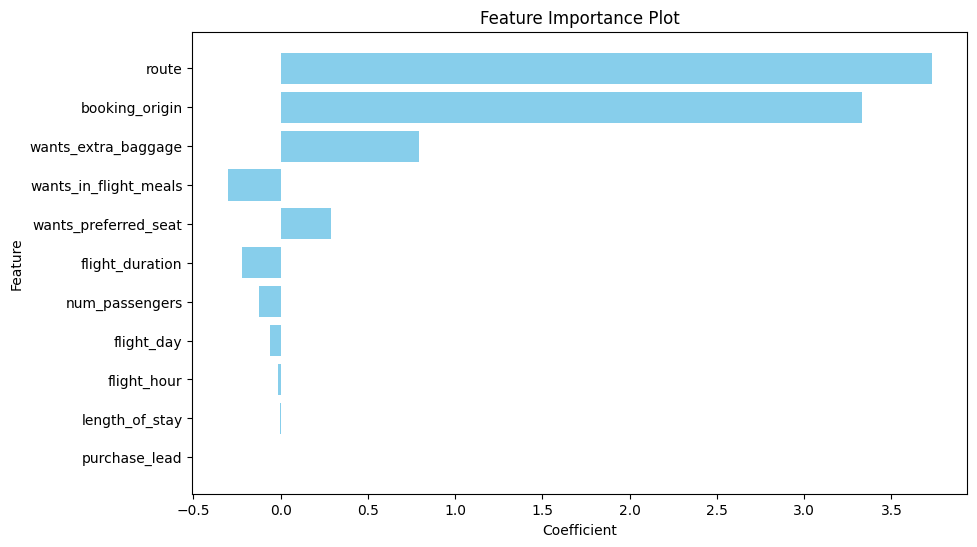

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_train, y_train)

# Get the coefficients assigned to each feature
coefficients = model.coef_[0]

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by absolute coefficient values
feature_importance_df['Abs_Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()
